### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of heart failure events based on clinical records. You have been provided with a dataset named **`"heart_failure_clinical_records.csv"`** which includes various clinical parameters of patients. The dataset comprises the following columns:

- age: Age of the patient (years)
- anaemia: Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: If the patient has diabetes (boolean)
- ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure: If the patient has hypertension (boolean)
- platelets: Platelets in the blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Sex of the patient (binary, 1 for male, 0 for female)
- smoking: If the patient smokes or not (boolean)
- time: Follow-up period (days)
- death_event: If the patient died during the follow-up period (boolean)

Your task is to use this dataset to build and evaluate machine learning models to predict heart failure events. You will perform data preprocessing, exploratory data analysis, and model training using GaussianNB, SVM, and XGBoost. Additionally, you will use ROC curves to analyze model performance and make cost-benefit decisions.

**Dataset credits:** Heart Failure Clinical Records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.



### Data Preprocessing and Exploratory Data Analysis

In [209]:
import pandas as pd
df = pd.read_csv("heart_failure_clinical_records.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [210]:
df.shape

(5000, 13)

In [211]:
# Check for missing values and handle them appropriately.
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  death_event               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [213]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


# Visualization

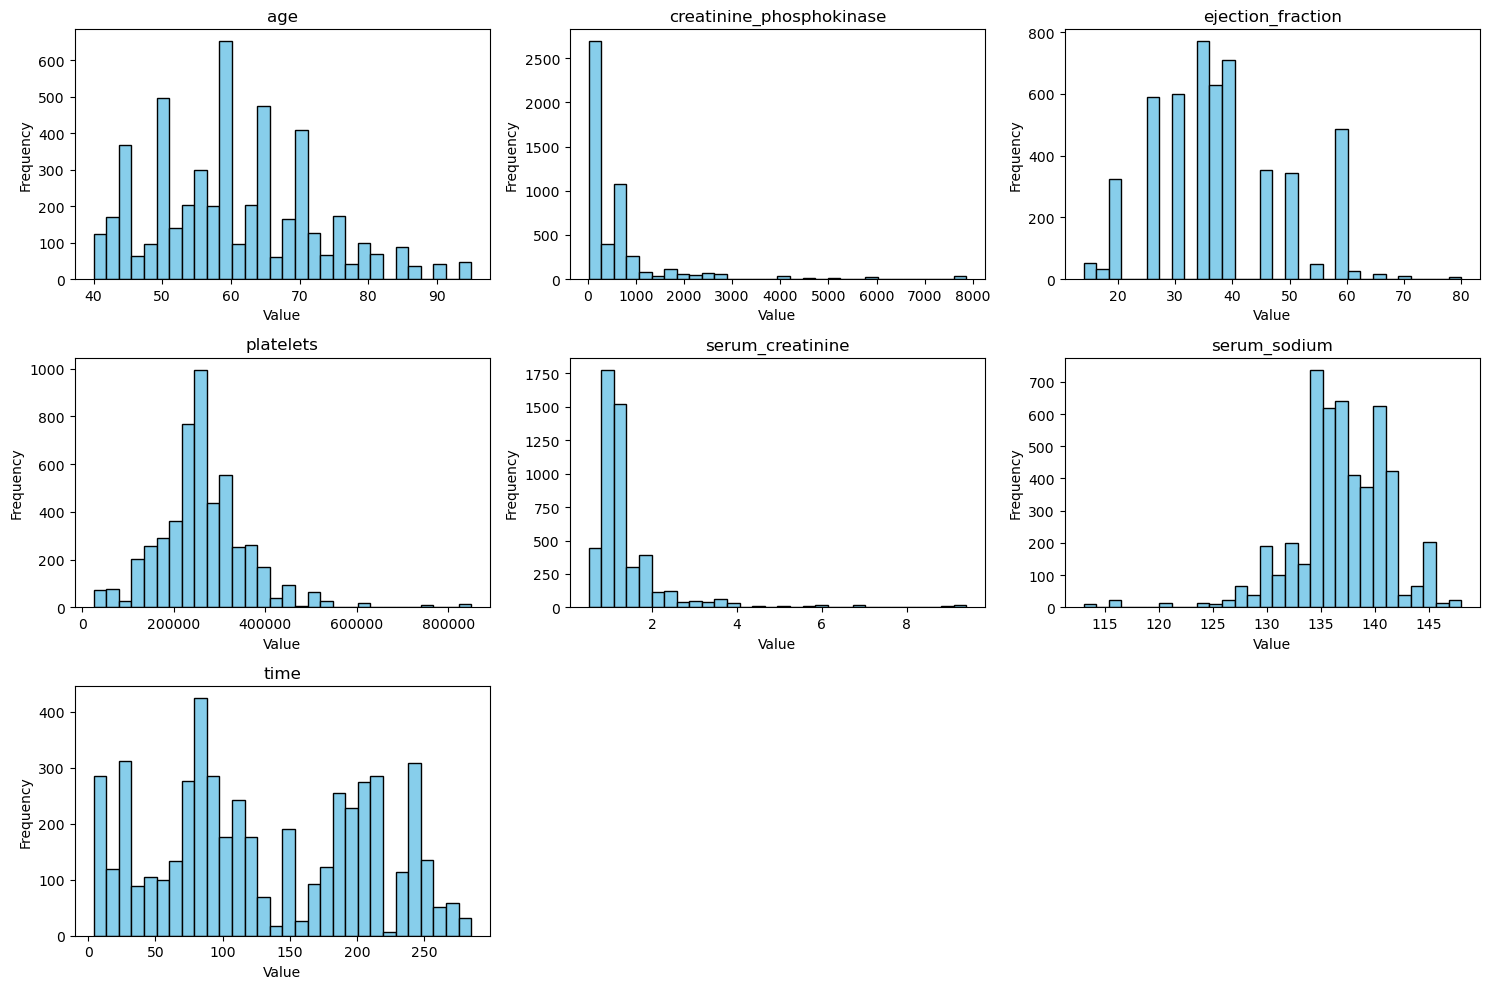

In [215]:
# Visualizations to understand the distribution of continuous features
import matplotlib.pyplot as plt

# List of features to plot
features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
            'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Set up the plot grid (e.g., 3 rows × 3 cols for 7 features)

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

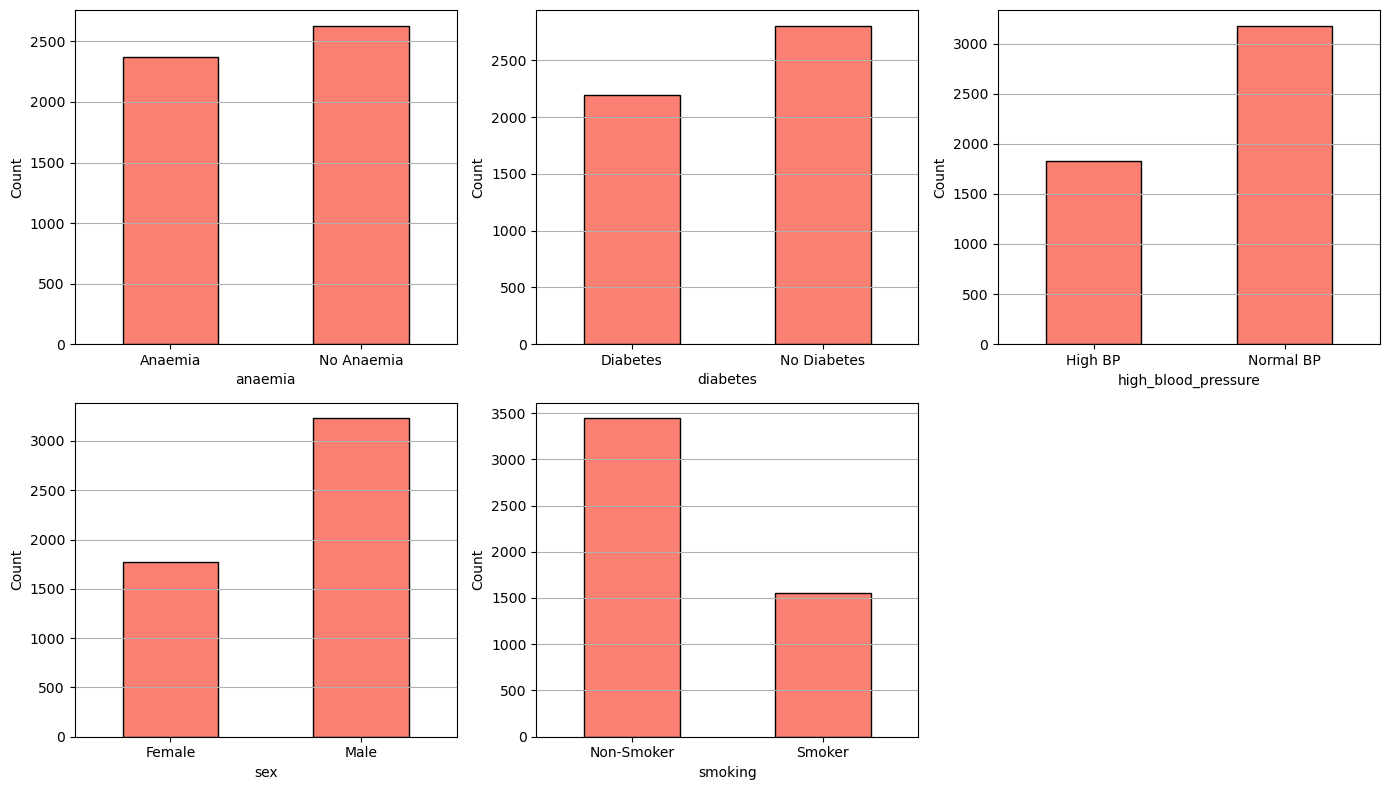

In [216]:
# Bar plots for binary features (anaemia, diabetes, high_blood_pressure, sex, smoking).
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Custom label mappings for each feature
label_mappings = {
    'anaemia': {0: 'No Anaemia', 1: 'Anaemia'},
    'diabetes': {0: 'No Diabetes', 1: 'Diabetes'},
    'high_blood_pressure': {0: 'Normal BP', 1: 'High BP'},
    'sex': {0: 'Female', 1: 'Male'},
    'smoking': {0: 'Non-Smoker', 1: 'Smoker'}
}

# Plotting
plt.figure(figsize=(14, 8))
for i, feature in enumerate(binary_features):
    plt.subplot(2, 3, i + 1)
    
    # Apply label mapping
    mapped_series = df[feature].map(label_mappings[feature])
    
    # Plot with readable labels
    mapped_series.value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

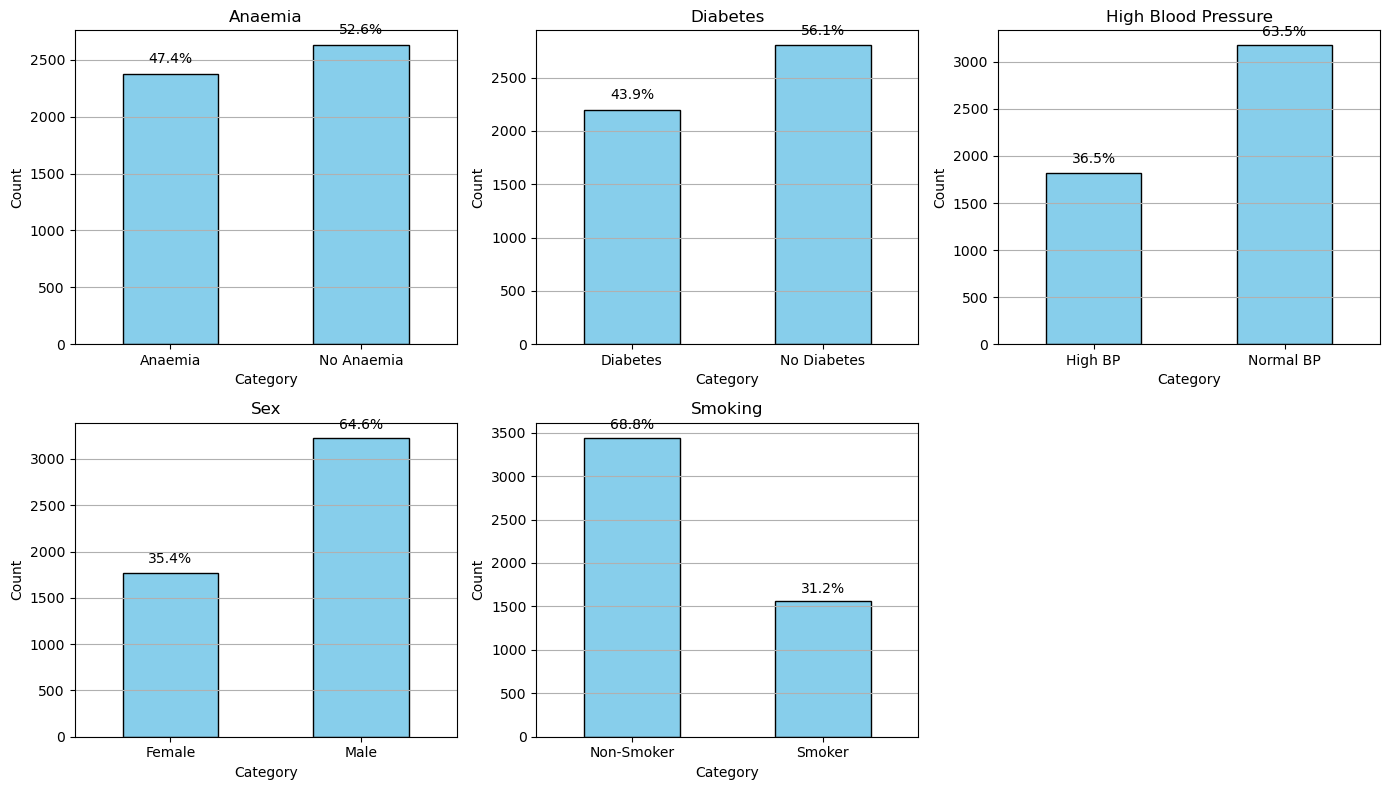

In [217]:
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
label_mappings = {
    'anaemia': {0: 'No Anaemia', 1: 'Anaemia'},
    'diabetes': {0: 'No Diabetes', 1: 'Diabetes'},
    'high_blood_pressure': {0: 'Normal BP', 1: 'High BP'},
    'sex': {0: 'Female', 1: 'Male'},
    'smoking': {0: 'Non-Smoker', 1: 'Smoker'}
}

plt.figure(figsize=(14, 8))
for i, feature in enumerate(binary_features):
    plt.subplot(2, 3, i + 1)
    mapped_series = df[feature].map(label_mappings[feature])
    value_counts = mapped_series.value_counts().sort_index()
    total = value_counts.sum()
    
    bars = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Add percentages on top of bars
    for idx, count in enumerate(value_counts):
        percentage = (count / total) * 100
        plt.text(idx, count + total*0.02, f'{percentage:.1f}%', ha='center', fontsize=10)
    
    plt.title(feature.replace('_', ' ').title())
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

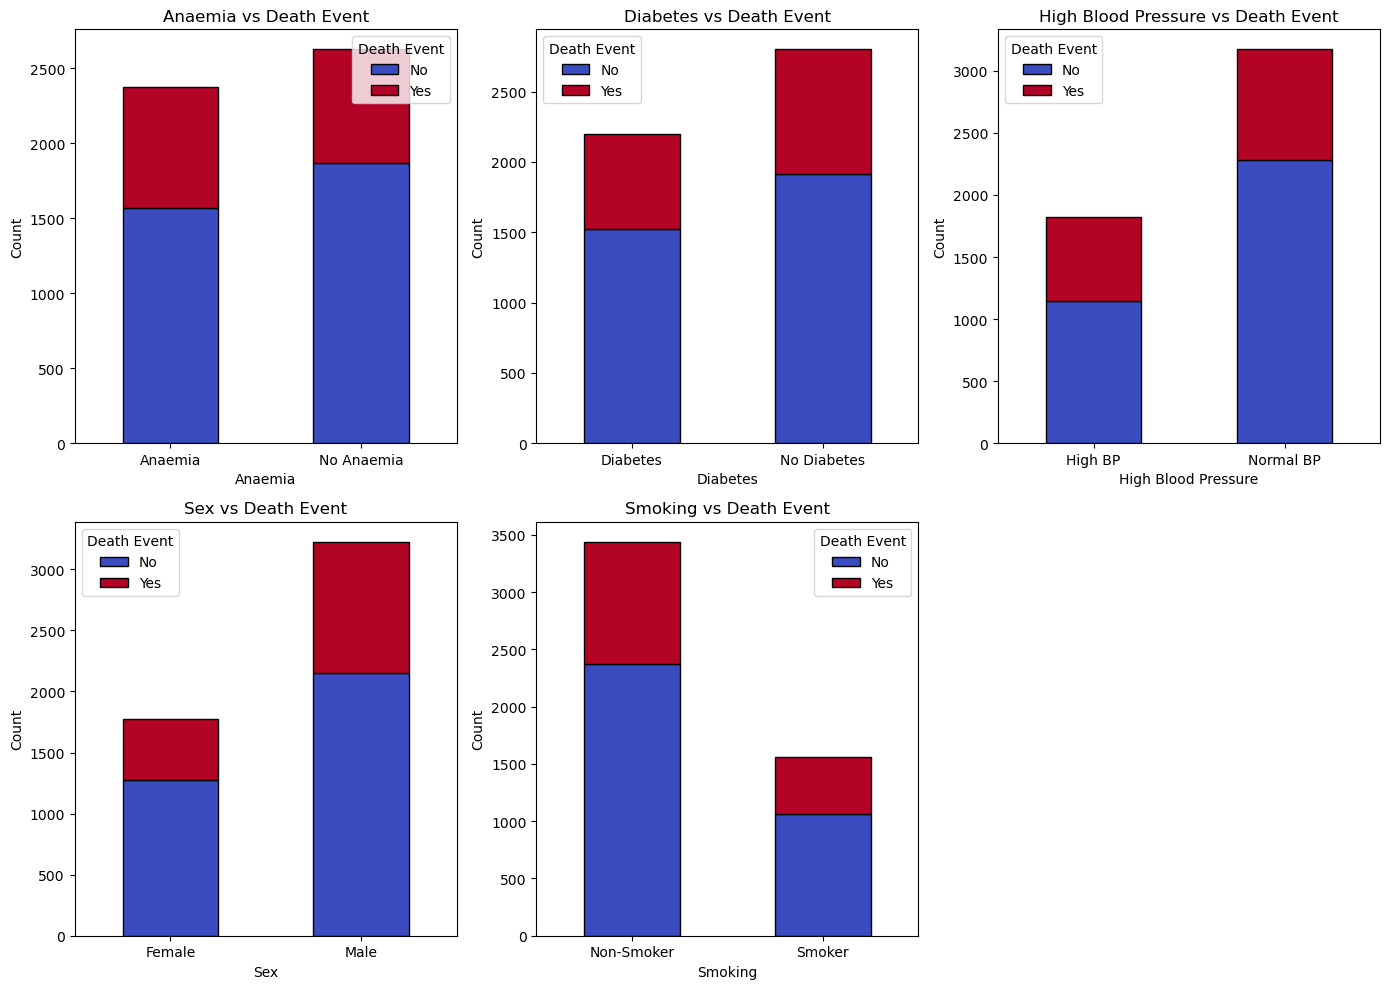

In [218]:
import seaborn as sns

target_col = 'death_event'  # Replace with your actual target column name

plt.figure(figsize=(14, 10))
for i, feature in enumerate(binary_features):
    plt.subplot(2, 3, i + 1)
    
    # Create crosstab of feature vs target
    ct = pd.crosstab(df[feature].map(label_mappings[feature]), df[target_col])
    
    # Plot stacked bar
    ct.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='coolwarm', edgecolor='black')
    
    plt.title(f"{feature.replace('_', ' ').title()} vs Death Event")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.legend(title='Death Event', labels=['No', 'Yes'])
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Split the dataset into training and test sets 

In [220]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop("death_event",axis=1)
y = df["death_event"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Scaling

In [222]:
# Normalize continuous features  (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time) using StandardScaler
from sklearn.preprocessing import StandardScaler

# List of continuous features to normalize
cont_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
X_train[cont_features] = scaler.fit_transform(X_train[cont_features])
X_test[cont_features] = scaler.transform(X_test[cont_features])

### Model Training and Evaluation with GaussianNB

In [224]:
# Initialize and train a GaussianNB model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       881
           1       0.75      0.47      0.58       369

    accuracy                           0.80      1250
   macro avg       0.78      0.70      0.72      1250
weighted avg       0.79      0.80      0.78      1250



In [225]:
# Calculate the AUC for the GaussianNB model.
from sklearn.metrics import roc_auc_score, roc_curve

probs_nb = model_nb.predict_proba(X_test)[:, 1]
auc_score_nb = roc_auc_score(y_test, probs_nb)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, probs_nb)

In [226]:
auc_score_nb

0.8790854196850709

In [227]:
# Find the probability threshold associated with 85% recall
import numpy as np 

desired_recall = 0.85
np. argmin(abs(tpr_nb-desired_recall))

192

In [228]:
thresholds_nb[192]

0.09000947872507015

In [229]:
probs_nb = model_nb.predict_proba(X_test)[:, 1]
y_pred = (probs_nb >= 0.09000947872507015).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       881
           1       0.55      0.85      0.67       369

    accuracy                           0.75      1250
   macro avg       0.73      0.78      0.73      1250
weighted avg       0.81      0.75      0.76      1250



### Model Training and Evaluation with SVM

In [231]:
# Initialize and train an SVM model with a linear kernel
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       881
           1       0.74      0.76      0.75       369

    accuracy                           0.85      1250
   macro avg       0.82      0.82      0.82      1250
weighted avg       0.85      0.85      0.85      1250



In [232]:
probs_svm = model_svm.predict_proba(X_test)[:, 1]
auc_score_svm = roc_auc_score(y_test, probs_svm)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probs_svm)

auc_score_svm

0.8932430811254763

In [247]:
# Find the probability threshold associated with 90% recall
desired_recall = 0.90
np.argmin(abs(tpr_svm-desired_recall))

240

In [249]:
thresholds_svm[240]

0.18429727660956094

In [251]:
y_pred = (probs_svm >= 0.18429727660956094).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78       881
           1       0.53      0.90      0.67       369

    accuracy                           0.73      1250
   macro avg       0.74      0.78      0.72      1250
weighted avg       0.82      0.73      0.75      1250



### Model Training and Evaluation with XGBoost

In [237]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.99      0.98      0.98       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [253]:
probs_xgb = model_xgb.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, probs_xgb)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probs_xgb)

auc_score_xgb

0.999249436308211

### Task 6: Summary and Conclusion


2. Summarize the results and compare the performance of the models.

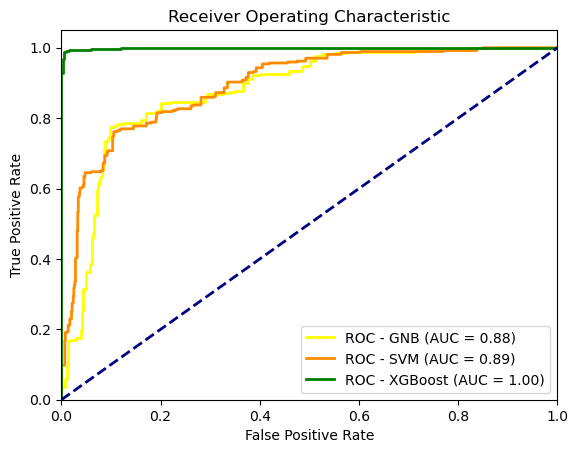

In [259]:
# Plot the ROC curves for all models
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='ROC - GNB (AUC = %0.2f)' % auc_score_nb)
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC - SVM (AUC = %0.2f)' % auc_score_svm)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='ROC - XGBoost (AUC = %0.2f)' % auc_score_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

GaussianNB Model Accuracy: 0.80
AUC: 0.88
Provides a baseline performance with a recall of 47% for the positive class.


SVM Model Accuracy: 0.85
AUC: 0.89
Shows improvement over GaussianNB, achieving a recall of 76% for the positive class.

XGBoost Model Accuracy: 0.99
AUC: 1.00
Outperforms other models, providing superior performance and generalization.

    
While GaussianNB and SVM models provide reasonable performance, 

XGBoost models achieve higher accuracy and AUC, making it the ideal choice for the heart failure prediction problem.